# Análisis Exploratorio generación de energía eléctrica

La idea de este segundo módulo es poner en práctica varias de las herramientas aprendidas en el módulo anterior (así como otras herramientas aprendidas en otros cursos) para realizar el Análisis Exploratorio de series de tiempo reales.

Es decir que la idea es acceder a sets de datos reales, disponibles en Internet, y llevar a cabo todo el conjunto de pasos requeridos para lograr extraer información relevante de estas Series de Tiempo. Estos pasos implicarán no sólo la lectura sino también la limpieza y pre-procesamiento de las Series (fases que usualmente requerirán más tiempo) hasta llegar a la fase de análisis exploratorio.

Y en esta lección realizaremos el Análisis Exploratorio de Series de Tiempo asociadas a la generación de energía eléctrica en Estados Unidos, usando datos reales suministrados por la "US Energy Information Administration".

Para abordar este ejercicio llevaremos a cabo las siguientes fases:

1. Lectura y exploración inicial del set de datos
2. Planteamiento del Análisis Exploratorio
3. Pre-procesamiento y limpieza de las Series de Tiempo
4. Análisis exploratorio
5. Conclusiones

Veamos entonces cada una de estas fases.

## 1. Lectura y exploración inicial del set de datos

El set de datos que usaremos contiene el comportamiento histórico de los niveles de generación de energía eléctrica (medidos en megawatts/hora, o MWh) para diferentes fuentes de generación (petróleo, hidroeléctricas, solar, térmica, carbón, nuclear, etc.) para el periodo comprendido entre el año 2001 y el momento en el cual grabé este video (2024).

Estos datos están disponibles en el sitio web del *U.S. Energy Information Administration* (EIA) y como se trata de datos son reales, y se añaden nuevos datos continuamente, es posible que cuando vean este video el intervalo de tiempo se haya ampliado (y esto podría cambiar los resultados del análisis, pues el comportamiento de los datos puede cambiar).

Para descargar el set de datos debemos llevar a cabo estos pasos:

1. Ir al sitio del EIA: https://www.eia.gov/electricity/data.php
2. Ir a la sección "Generation and thermal output"
3. Descargar el archivo Excel señalado como "Monthly (back to 2001)"

Si quieren usar exactamente el mismo set de datos usado al momento de grabar este video, se puede descargar desde [este enlace](https://docs.google.com/spreadsheets/d/1mVeo3v8JNF_2OlCKtmy96Suq9jKEWHXl/edit?usp=sharing&ouid=115015192289478197665&rtpof=true&sd=true).

### 1.1. Estructura del archivo de Excel

- El archivo contiene un total de 19 hojas de cálculo
- Las series de tiempo (2021-2024) se encuentran en las primeras 18 hojas
- Las hojas 0 a la 4 tienen su encabezado en la fila 0
- Mientras que las hojas restantes (5 a 17) tienen el encabezado en la fila 4
- Todas las hojas contienen las mismas columnas

Esta información es clave para leer correctamente el archivo como un DataFrame de Pandas.

### 1.2. Lectura del set de datos en Pandas

Esta será la estrategia para leer el set de datos:

1. Leeremos cada hoja individual en un DataFrame de Pandas
2. El conjunto de DataFrames será almacenado en un listado de Pandas
3. Como todos los DataFrames contienen las mismas columnas, luego concatenaremos el listado anterior en un único DataFrame

Para la lectura de las hojas de cálculo individuales resultará clave tener en cuenta las características del archivo de Excel mencionadas anteriormente.

Veamos cómo implementar estos pasos:

In [2]:
# Leer cada DataFrame
import pandas as pd

RUTA = 'generation_monthly.xlsx'

# Estructura del archivo XLSX
# - Hojas 0, 1, 2, 3, 4: encabezado en la fila 0
# - Hojas 5:17: encabezado en la fila 4

SHEET_NAMES = list(range(18))     # Hojas de cálculo a leer (0 a 17)
SKIP_ROWS = [None] * 5 + [4] * 13 # Número de filas a "saltar" al momento de la lectura

# Leer cada hoja de cálculo en un DataFrame y almacenarlo en una lista
DF = [None]*len(SHEET_NAMES)
for i, sheet in enumerate(SHEET_NAMES):
    DF[i] = pd.read_excel(RUTA, sheet_name=sheet, skiprows=SKIP_ROWS[i])

# Imprimir encabezados para verificar que la lectura ha sido correcta
for df in DF:
    print(df.columns)

Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (Megawatthours)'],
      dtype='object')
Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (Megawatthours)'],
      dtype='object')
Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (Megawatthours)'],
      dtype='object')
Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (Megawatthours)'],
      dtype='object')
Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (Megawatthours)'],
      dtype='object')
Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (Megawatthours)'],
      dtype='object')
Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (Megawatthours)'],
      dtype='object')
Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (

Vemos que en esencia los encabezados son muy similares aunque existen ligeras diferencias. Por ejemplo, en unos casos aparece una columna etiquetada como 'GENERATION (Megawatthours)' mientras que en otros aparece 'GENERATION\n(Megawatthours)'.

Debemos garantizar que las columnas tengan exactamente la misma denominación para posteriormente poder concatenar los DataFrames.

Así que leamos nuevamente las hojas de cálculo pero usemos en este caso el argumento "names" para renombrar las columnas:

In [3]:
# Redefinir nombres y leer nuevamente
NAMES = ['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
        'GENERATION (MWh)']

DF = [None]*len(SHEET_NAMES)

for i, sheet in enumerate(SHEET_NAMES):
    DF[i] = pd.read_excel(RUTA, sheet_name=sheet, skiprows=SKIP_ROWS[i],
                         names=NAMES)

# Imprimir encabezados
for df in DF:
    print(df.columns)

Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (MWh)'],
      dtype='object')
Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (MWh)'],
      dtype='object')
Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (MWh)'],
      dtype='object')
Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (MWh)'],
      dtype='object')
Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (MWh)'],
      dtype='object')
Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (MWh)'],
      dtype='object')
Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (MWh)'],
      dtype='object')
Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (MWh)'],
      dtype='object')
Index(['YEAR', 'MONTH', 'STATE', 'TYPE O

¡Perfecto! Ya hemos leído todos los DataFrames y todos tienen columnas con exactamente el mismo nombre. Ahora simplemente concatenamos estos DataFrames en uno sólo (Lección 2 curso "Pandas Nivel Intermedio"):

In [4]:
df = pd.concat(DF, ignore_index=True)
df

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (MWh)
0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,2001,1,AK,Total Electric Power Industry,Wind,87.0
...,...,...,...,...,...,...
543542,2024,3,WY,"Electric Generators, Electric Utilities",Coal,1710200.0
543543,2024,3,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,59370.0
543544,2024,3,WY,"Electric Generators, Electric Utilities",Natural Gas,178164.0
543545,2024,3,WY,"Electric Generators, Electric Utilities",Petroleum,4482.0


Bien, habiendo leído el set de datos hagamos una exploración inicial:

- Se tienen en total 543547 registros, que van desde enero de 2001 hasta marzo de 2024.
- Por cada año/mes se tiene el nivel de generación (MWh) para diferentes estados ("STATE"), tipo de productor ("TYPE OF PRODUCER") y fuente de generación ("ENERGY SOURCE").

Este es entonces es el punto de partida del ejercicio. Veamos ahora los objetivos del Análisis Exploratorio

## 2. Planteamiento del Análisis Exploratorio

Antes de comenzar a realizar el análisis debemos definir el objetivo del mismo. Este es siempre el punto de partida en cualquier Análisis Exploratorio (y de hecho en cualquier proyecto de Ciencia de Datos y Machine Learning).

Volviendo al set de datos que acabamos de leer vemos que tenemos múltiples series de tiempo que se podrían analizar por ejemplo por Estado o por tipo de producción o por fuente de energía.

Así que se podrían realizar múltiples análisis exploratorios, por ejemplo:

- Comportamiento histórico de las series a nivel de estados
- Comportamiento histórico de las series a nivel de tipo de productor
- Comportamiento histórico de las series a nivel de fuente de generación

En este ejercicio nos enfocaremos en esta última opción (y les sugiero por su cuenta explorar las otras dos opciones).

Así que la idea es analizar el comportamiento histórico de las series a nivel de fuente de generación. Y podríamos plantearnos una pregunta general que intentaremos responder con este análisis:

> **¿Existen fuentes de generación que se han mantenido estables o que han incrementado/reducido su nivel de generación en el periodo 2001-2024?**

Esta pregunta guiará todas las fases que vienen a continuación, comenzando con la preparación y limpieza de los datos.

## 3. Pre-procesamiento y limpieza de las Series de Tiempo

Al haber planteado el objetivo del Análisis Exploratorio ya estaremos definiendo el camino a seguir en esta fase de preparación de los datos.

Comencemos convirtiendo el DataFrame a Series de Tiempo. Para ello crearemos una columna "DATE" que contendrá el año y el mes del registro. Como no hay información sobre el día en que fue recolectada la información asignaremos por defecto el primer día del mes a cada registro:

In [5]:
# Crear columna "DATE" en el formato datetime año-mes-día. Asignar
# por defecto el día 1
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))
df

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (MWh),DATE
0,2001,1,AK,Total Electric Power Industry,Coal,46903.0,2001-01-01
1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0,2001-01-01
2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0,2001-01-01
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0,2001-01-01
4,2001,1,AK,Total Electric Power Industry,Wind,87.0,2001-01-01
...,...,...,...,...,...,...,...
543542,2024,3,WY,"Electric Generators, Electric Utilities",Coal,1710200.0,2024-03-01
543543,2024,3,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,59370.0,2024-03-01
543544,2024,3,WY,"Electric Generators, Electric Utilities",Natural Gas,178164.0,2024-03-01
543545,2024,3,WY,"Electric Generators, Electric Utilities",Petroleum,4482.0,2024-03-01


Ahora podemos fijar la columna "DATE" como índice del DataFrame y podemos eliminar las columnas "YEAR" y "MONTH" (ya no son necesarias):

In [6]:
df.set_index('DATE', inplace=True)
df.drop(columns=['YEAR', 'MONTH'], inplace=True)
df

,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (MWh)
DATE,,,,
2001-01-01,AK,Total Electric Power Industry,Coal,46903.0
2001-01-01,AK,Total Electric Power Industry,Petroleum,71085.0
2001-01-01,AK,Total Electric Power Industry,Natural Gas,367521.0
2001-01-01,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
2001-01-01,AK,Total Electric Power Industry,Wind,87.0
...,...,...,...,...
2024-03-01,WY,"Electric Generators, Electric Utilities",Coal,1710200.0
2024-03-01,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,59370.0
2024-03-01,WY,"Electric Generators, Electric Utilities",Natural Gas,178164.0


Como en este análisis nos enfocaremos en el comportamiento histórico de las fuentes de generación, podemos eliminar las columnas "STATE" y "TYPE OF PRODUCER":

In [7]:
df.drop(columns=['STATE', 'TYPE OF PRODUCER'], inplace=True)
df

,ENERGY SOURCE,GENERATION (MWh)
DATE,,
2001-01-01,Coal,46903.0
2001-01-01,Petroleum,71085.0
2001-01-01,Natural Gas,367521.0
2001-01-01,Hydroelectric Conventional,104549.0
2001-01-01,Wind,87.0
...,...,...
2024-03-01,Coal,1710200.0
2024-03-01,Hydroelectric Conventional,59370.0
2024-03-01,Natural Gas,178164.0


La columna "ENERGY SOURCE" es una columna categórica (que contiene las diferentes fuentes de generación usadas). Veamos las diferentes categorías:

In [8]:
df['ENERGY SOURCE'].value_counts()

ENERGY SOURCE
Total                             79768
Natural Gas                       72379
Petroleum                         68575
Coal                              51408
Other Biomass                     50496
Hydroelectric Conventional        42247
Other                             40067
Wood and Wood Derived Fuels       33342
Wind                              28372
Solar Thermal and Photovoltaic    23544
Other Gases                       19604
Nuclear                           18054
Pumped Storage                    11041
Geothermal                         4650
Name: count, dtype: int64

Estas son las fuentes de generación que tendremos. Y cada una será una Serie de Tiempo.

Por ejemplo, para "Coal" tendremos registros históricos desde 2001-01-01 hasta 2024-03-01, algo similar ocurrirá para "Petroleum" y así sucesivamente.

Sin embargo, en el DataFrame están combinadas todas las Series de Tiempo y la idea es separar unas de otras.

Podemos por ejemplo usar "groupby" (lecciones 4 y 5 del curso "Pandas Nivel Intermedio") para agrupar los datos por fuente de generación y, por supuesto, por fecha. Y cada agrupación será la suma de los niveles de generación correspondientes.

Veamos cómo generar estas agrupaciones:

In [9]:
# Agrupar por fecha y ENERGY SOURCE y totalizar (sum)
grupos = df.groupby(['ENERGY SOURCE', df.index]).sum()
grupos

GENERATION (MWh)
ENERGY SOURCE               DATE                        
Coal                        2001-01-01       709148444.0
                            2001-02-01       598941934.0
                            2001-03-01       621076042.0
                            2001-04-01       562682612.0
                            2001-05-01       606371658.0
...                                                  ...
Wood and Wood Derived Fuels 2023-11-01        10220596.0
                            2023-12-01        10335564.0
                            2024-01-01        11285817.0
                            2024-02-01         9870730.0
                            2024-03-01        10001077.0

[3906 rows x 1 columns]

Y acá ya tenemos cada serie de tiempo en una agrupación diferente, pero todas siguen estando en un mismo DataFrame.

La idea es ahora crear un DataFrame individual por cada Serie de Tiempo. Comencemos extrayendo los nombres que tendrá cada serie (correspondiente al "ENERGY SOURCE"):

In [13]:
nombres_series = grupos.index.get_level_values('ENERGY SOURCE').unique()
nombres_series

Index(['Coal', 'Geothermal', 'Hydroelectric Conventional', 'Natural Gas',
       'Nuclear', 'Other', 'Other Biomass', 'Other Gases', 'Petroleum',
       'Pumped Storage', 'Solar Thermal and Photovoltaic', 'Total', 'Wind',
       'Wood and Wood Derived Fuels'],
      dtype='object', name='ENERGY SOURCE')

Y ahora crearemos un diccionario donde cada ítem contendrá una serie con el nombre correspondiente. Además, no incluiremos el nombre de serie "Total" porque, como su nombre lo indica, no se refiere a una fuente de generación en particular sino al nivel de generación total:

In [14]:
series = {}

for nombre in nombres_series:
    # No incluir "total"
    if nombre != 'Total':
        # Extraer el grupo correspondiente con el método "xs"
        # y organizar el índice (fechas) de manera ascendente
        serie = grupos.xs(nombre, level='ENERGY SOURCE').sort_index()
        # Almacenar la serie en el diccionario
        series[nombre] = serie

Veamos un ejemplo de una Serie de Tiempo:

In [15]:
# Ejemplo de una serie
series['Petroleum']

,GENERATION (MWh)
DATE,
2001-01-01,72447372.0
2001-02-01,41366012.0
2001-03-01,46932022.0
2001-04-01,43453506.0
2001-05-01,41559958.0
...,...
2023-11-01,4664633.0
2023-12-01,5085101.0
2024-01-01,7237765.0


¡Perfecto! Ya tenemos cada Serie de Tiempo almacenada como un DataFrame en el diccionario. Veamos cuántos registros tiene cada Serie así como las fechas de inicio y finalización de cada una:

In [16]:
for key, value in series.items():
    print(f'Nro. registros serie {key}: {len(series[key])}')
    print(f'Fecha inicio-final serie {key}: {series[key].index.min()}-{series[key].index.max()}' )
    print('-'*100)

Nro. registros serie Coal: 279
Fecha inicio-final serie Coal: 2001-01-01 00:00:00-2024-03-01 00:00:00
----------------------------------------------------------------------------------------------------
Nro. registros serie Geothermal: 279
Fecha inicio-final serie Geothermal: 2001-01-01 00:00:00-2024-03-01 00:00:00
----------------------------------------------------------------------------------------------------
Nro. registros serie Hydroelectric Conventional: 279
Fecha inicio-final serie Hydroelectric Conventional: 2001-01-01 00:00:00-2024-03-01 00:00:00
----------------------------------------------------------------------------------------------------
Nro. registros serie Natural Gas: 279
Fecha inicio-final serie Natural Gas: 2001-01-01 00:00:00-2024-03-01 00:00:00
----------------------------------------------------------------------------------------------------
Nro. registros serie Nuclear: 279
Fecha inicio-final serie Nuclear: 2001-01-01 00:00:00-2024-03-01 00:00:00
----------

Como podemos ver, todas las series tienen el mismo número de registros: un total de 279 meses comenzando en 2001-01 y terminando en 2024-03.

Es decir todas tienen exactamente la misma estructura así que resultará más práctico combinarlas en un único DataFrame, donde cada columna será precisamente una Serie.

Sin embargo, antes de hacer esto verifiquemos si hay datos (observaciones) faltantes en las Series (Lección 4 curso "Series de Tiempo: pre-procesamiento"):

In [17]:
for key, value in series.items():
    nfaltantes = series[key].isna().sum()
    print(f'Nro. registros faltantes serie {key}: {nfaltantes}')

Nro. registros faltantes serie Coal: GENERATION (MWh)    0
dtype: int64
Nro. registros faltantes serie Geothermal: GENERATION (MWh)    0
dtype: int64
Nro. registros faltantes serie Hydroelectric Conventional: GENERATION (MWh)    0
dtype: int64
Nro. registros faltantes serie Natural Gas: GENERATION (MWh)    0
dtype: int64
Nro. registros faltantes serie Nuclear: GENERATION (MWh)    0
dtype: int64
Nro. registros faltantes serie Other: GENERATION (MWh)    0
dtype: int64
Nro. registros faltantes serie Other Biomass: GENERATION (MWh)    0
dtype: int64
Nro. registros faltantes serie Other Gases: GENERATION (MWh)    0
dtype: int64
Nro. registros faltantes serie Petroleum: GENERATION (MWh)    0
dtype: int64
Nro. registros faltantes serie Pumped Storage: GENERATION (MWh)    0
dtype: int64
Nro. registros faltantes serie Solar Thermal and Photovoltaic: GENERATION (MWh)    0
dtype: int64
Nro. registros faltantes serie Wind: GENERATION (MWh)    0
dtype: int64
Nro. registros faltantes serie Wood and 

Muy bien, todas las Series de Tiempo están completas. Verifiquemos si contienen marcas de tiempo faltantes (Lección 5 curso "Series de Tiempo: pre-procesamiento"):

In [18]:
for key, value in series.items():
    # Extraer serie
    serie = series[key]
    
    # Definir rango completo de fechas ideales
    rango_completo = pd.date_range(start=serie.index.min(), end=serie.index.max(), freq='MS') # MS: month start
    
    # Reindexar con base en el rango completo
    serie_reindex = serie.reindex(rango_completo)
    
    # Si aparecen valores NaN es porque hay marcas de tiempo faltantes
    nfaltantes = serie_reindex.isna().sum()
    print(f'Nro. marcas de tiempo faltantes serie {key}: {nfaltantes}')

Nro. marcas de tiempo faltantes serie Coal: GENERATION (MWh)    0
dtype: int64
Nro. marcas de tiempo faltantes serie Geothermal: GENERATION (MWh)    0
dtype: int64
Nro. marcas de tiempo faltantes serie Hydroelectric Conventional: GENERATION (MWh)    0
dtype: int64
Nro. marcas de tiempo faltantes serie Natural Gas: GENERATION (MWh)    0
dtype: int64
Nro. marcas de tiempo faltantes serie Nuclear: GENERATION (MWh)    0
dtype: int64
Nro. marcas de tiempo faltantes serie Other: GENERATION (MWh)    0
dtype: int64
Nro. marcas de tiempo faltantes serie Other Biomass: GENERATION (MWh)    0
dtype: int64
Nro. marcas de tiempo faltantes serie Other Gases: GENERATION (MWh)    0
dtype: int64
Nro. marcas de tiempo faltantes serie Petroleum: GENERATION (MWh)    0
dtype: int64
Nro. marcas de tiempo faltantes serie Pumped Storage: GENERATION (MWh)    0
dtype: int64
Nro. marcas de tiempo faltantes serie Solar Thermal and Photovoltaic: GENERATION (MWh)    0
dtype: int64
Nro. marcas de tiempo faltantes ser

¡Excelente! Las series de tiempo no contienen ni observaciones ni marcas de tiempo faltantes. Ahora sí podemos concatenarlas en un único DataFrame donde cada columna será precisamente una serie de tiempo:

In [19]:
SERIES = pd.concat([series[key] for key in sorted(series)], axis=1) # Usar sorted para escoger los keys en orden alfabético
SERIES.columns = list(sorted(series.keys())) # Nuevamente sorted para que las columnas coincidan con la concatenación anterior
SERIES

,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Other,Other Biomass,Other Gases,Petroleum,Pumped Storage,Solar Thermal and Photovoltaic,Wind,Wood and Wood Derived Fuels
DATE,,,,,,,,,,,,,
2001-01-01,709148444.0,4917300.0,75408194.0,169554652.0,274828308.0,3966680.0,4834584.0,2873768.0,72447372.0,-2354504.0,26000.0,1557000.0,12764848.0
2001-02-01,598941934.0,4292176.0,69891562.0,151867704.0,245089628.0,3487797.0,4385324.0,2702636.0,41366012.0,-2827824.0,50272.0,1724968.0,10788604.0
2001-03-01,621076042.0,4760092.0,81908758.0,177457656.0,248562848.0,3724622.0,4756158.0,3076724.0,46932022.0,-3093380.0,125992.0,2128480.0,11410160.0
2001-04-01,562682612.0,4379964.0,72051976.0,183370982.0,224012104.0,3829824.0,4748957.0,2791372.0,43453506.0,-3183660.0,155036.0,2738782.0,11284028.0
2001-05-01,606371658.0,4285520.0,76702540.0,203736820.0,246049780.0,3945070.0,4842966.0,3138220.0,41559958.0,-2490104.0,324212.0,2540116.0,10959732.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,204923599.0,5638423.0,72399740.0,541040387.0,249030576.0,3319165.0,5287793.0,3994568.0,4664633.0,-1357856.0,41082834.0,148169185.0,10220596.0
2023-12-01,225085006.0,5651912.0,77343647.0,584694322.0,275591028.0,3448095.0,5787910.0,4269306.0,5085101.0,-2023852.0,36798651.0,153482225.0,10335564.0
2024-01-01,302647648.0,5470948.0,84946810.0,641801898.0,276318940.0,3219882.0,5287918.0,4115875.0,7237765.0,-1643884.0,38605773.0,139902423.0,11285817.0


¡Y listo! En este punto ya tenemos nuestras Series de Tiempo.

Algunas características de este DataFrame:

- Contiene un total de 13 series de tiempo (columnas): "Coal", "Geothermal", "Hydroelectric Conventional", etc.
- Cada serie contiene un total de 279 registros tomados con una frecuencia mensual, comenzando el 1 de enero de 2001 y terminando el 1 de marzo de 2024 (23 años y 3 meses en total)

Como parte de la limpieza siempre es recomendable analizar el rango de valores de las Series así como la presencia de posibles valores extremos.

Veamos el rango de valores de las Series:

In [20]:
# Rangos de valores
SERIES.describe()

,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Other,Other Biomass,Other Gases,Petroleum,Pumped Storage,Solar Thermal and Photovoltaic,Wind,Wood and Wood Derived Fuels
count,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02
mean,5.026552e+08,5.120589e+06,8.941769e+07,3.816433e+08,2.633793e+08,4.270163e+06,6.058380e+06,4.119899e+06,1.638095e+07,-2.088996e+06,1.205458e+07,5.582134e+07,1.270014e+07
std,1.635497e+08,3.404140e+05,1.580739e+07,1.408690e+08,1.915940e+07,4.798267e+05,8.327512e+05,5.886359e+05,1.368418e+07,6.427387e+05,1.762688e+07,4.851865e+07,1.120029e+06
min,1.534418e+08,3.934126e+06,5.746968e+07,1.518677e+08,2.181894e+08,2.771014e+06,4.344496e+06,2.702636e+06,3.864213e+06,-3.991422e+06,1.085200e+04,1.557000e+06,8.505002e+06
25%,3.577194e+08,4.903599e+06,7.752415e+07,2.637422e+08,2.505092e+08,4.003680e+06,5.370308e+06,3.746857e+06,6.813663e+06,-2.567304e+06,2.487980e+05,9.821996e+06,1.205031e+07
50%,5.393809e+08,5.105396e+06,8.765086e+07,3.690737e+08,2.622388e+08,4.279070e+06,6.011054e+06,4.137149e+06,9.492387e+06,-2.027980e+06,1.725708e+06,4.708864e+07,1.271386e+07
75%,6.374108e+08,5.365569e+06,9.991071e+07,4.802993e+08,2.791445e+08,4.556732e+06,6.780444e+06,4.515468e+06,2.308698e+07,-1.635820e+06,2.005186e+07,9.096213e+07,1.341326e+07
max,7.605393e+08,6.232014e+06,1.304285e+08,8.022169e+08,2.985962e+08,5.983758e+06,7.955108e+06,5.805987e+06,7.244737e+07,-4.128840e+05,7.551952e+07,1.846684e+08,1.535084e+07


Acá vemos algo interesante y es que la fuente "Pumped Storage" tiene un promedio negativo (-2.08 x 10^6 MWh). Esto no tiene sentido pues estamos hablando de generación de energía (que debería ser positiva).

En realidad esta fuente corresponde a energía almacenada y que luego es usada para alimentar (es decir es "bombeada") otras fuentes de generación. Por tanto, "Pumped storage" no es como tal una fuente de generación y la podemos eliminar:

In [21]:
SERIES.drop(columns=['Pumped Storage'], inplace=True)
SERIES

,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Other,Other Biomass,Other Gases,Petroleum,Solar Thermal and Photovoltaic,Wind,Wood and Wood Derived Fuels
DATE,,,,,,,,,,,,
2001-01-01,709148444.0,4917300.0,75408194.0,169554652.0,274828308.0,3966680.0,4834584.0,2873768.0,72447372.0,26000.0,1557000.0,12764848.0
2001-02-01,598941934.0,4292176.0,69891562.0,151867704.0,245089628.0,3487797.0,4385324.0,2702636.0,41366012.0,50272.0,1724968.0,10788604.0
2001-03-01,621076042.0,4760092.0,81908758.0,177457656.0,248562848.0,3724622.0,4756158.0,3076724.0,46932022.0,125992.0,2128480.0,11410160.0
2001-04-01,562682612.0,4379964.0,72051976.0,183370982.0,224012104.0,3829824.0,4748957.0,2791372.0,43453506.0,155036.0,2738782.0,11284028.0
2001-05-01,606371658.0,4285520.0,76702540.0,203736820.0,246049780.0,3945070.0,4842966.0,3138220.0,41559958.0,324212.0,2540116.0,10959732.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,204923599.0,5638423.0,72399740.0,541040387.0,249030576.0,3319165.0,5287793.0,3994568.0,4664633.0,41082834.0,148169185.0,10220596.0
2023-12-01,225085006.0,5651912.0,77343647.0,584694322.0,275591028.0,3448095.0,5787910.0,4269306.0,5085101.0,36798651.0,153482225.0,10335564.0
2024-01-01,302647648.0,5470948.0,84946810.0,641801898.0,276318940.0,3219882.0,5287918.0,4115875.0,7237765.0,38605773.0,139902423.0,11285817.0


Verifiquemos si las Series restantes tienen valores extremos. Podemos usar por ejemplo "boxplots" (Lección 9 curso "Series de Tiempo: pre-procesamiento"):

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_32008\3766380854.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


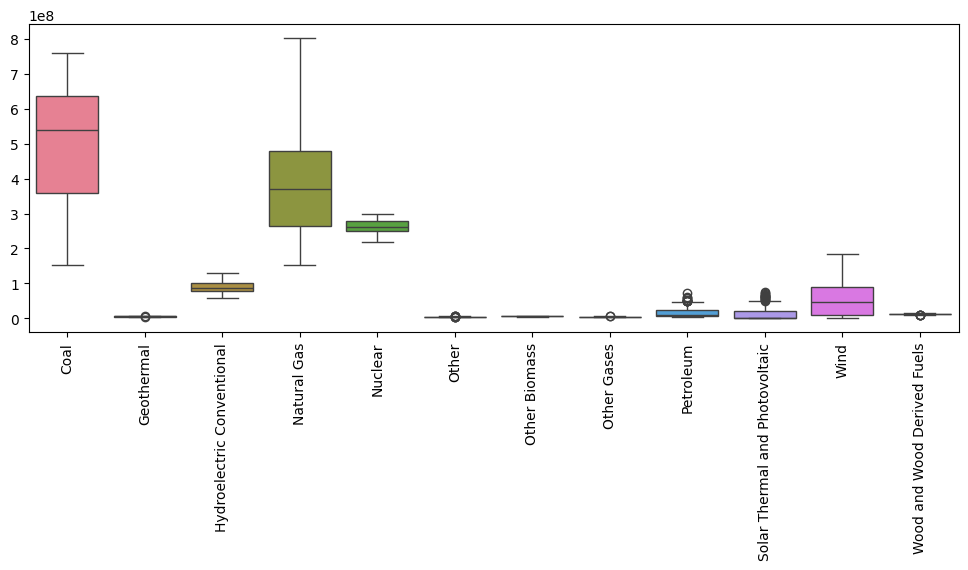

In [22]:
# Verificar si hay valores extremos
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(12,4))
ax=sns.boxplot(SERIES, ax = ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Vemos que las series "Other", "other gases", "petroleum", "solar" y "wood" tienen valores extremos pero esto puede ser debido a que ciertos estados generan más que el promedio de estados unidos. Sin embargo todos los valores están dentro de los rangos "normales" de generación.

Por tanto no haremos nada con estos valores extremos y con esto ya estamos listos para realizar el análisis exploratorio.

## 4. Análisis exploratorio

Recordemos la pregunta guía de este Análisis Exploratorio:

> **¿Existen fuentes de generación que se han mantenido estables o que han incrementado/reducido su nivel de generación en el periodo 2001-2024?**

Y esta pregunta podría ser respondida de diferentes formas, pero el objetivo es usar algunas de las herramientas aprendidas hasta el momento (y en cursos anteriores) así como algo de **creatividad**.

En cualquier Análisis Exploratorio no existe una ruta lineal así que aquí plantearé algunas posibles rutas para responder a la pregunta.

Podríamos por ejemplo:

- Graficar las Series de Tiempo de manera individual para determinar cuáles se han mantenido estables o cuáles han incrementado o reducido sus niveles de generación
- Realizar un análisis de posibles correlaciones entre diferentes pares de Series de Tiempo para determinar si, por ejemplo, algunas fuentes han venido reemplazado a otras a lo largo del tiempo
- Verificar si hay Series de Tiempo estacionales y determinar, por ejemplo, meses del año donde hay mayor o menor generación
- Analizar el porcentaje de generación que del total representa cada Serie a lo largo del tiempo

Intentemos entonces realizar estos análisis. Y recordemos que la idea es tras cada análisis **escribir unas breves observaciones que intenten dar respuesta a la pregunta planteada**.

### 4.1. Gráficos de las series individuales

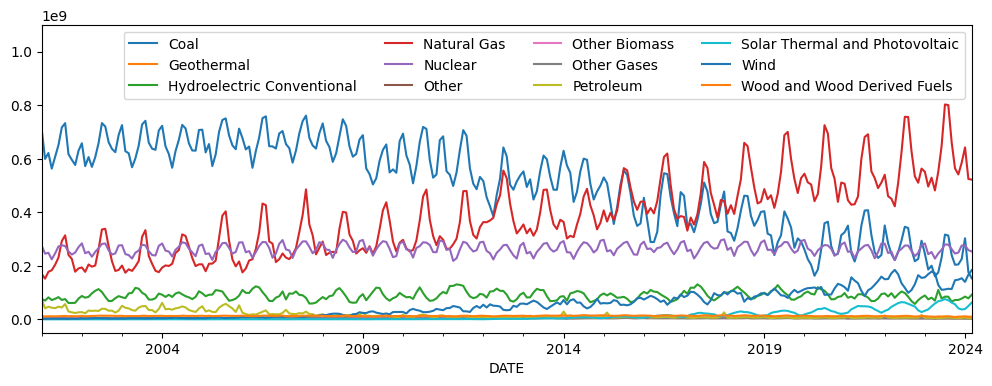

In [23]:
# Gráficar las series
ax = SERIES.plot(figsize=(12,4));
ax.legend(loc='best', ncols=4)
ax.set_ylim([-0.5e8, 11e8]);

Al parecer algunas series son estacionales y otras tienen tendencia y estacionalidad. Sin embargo no es claro a partir de la gráfica.

Generemos gráficos individuales:

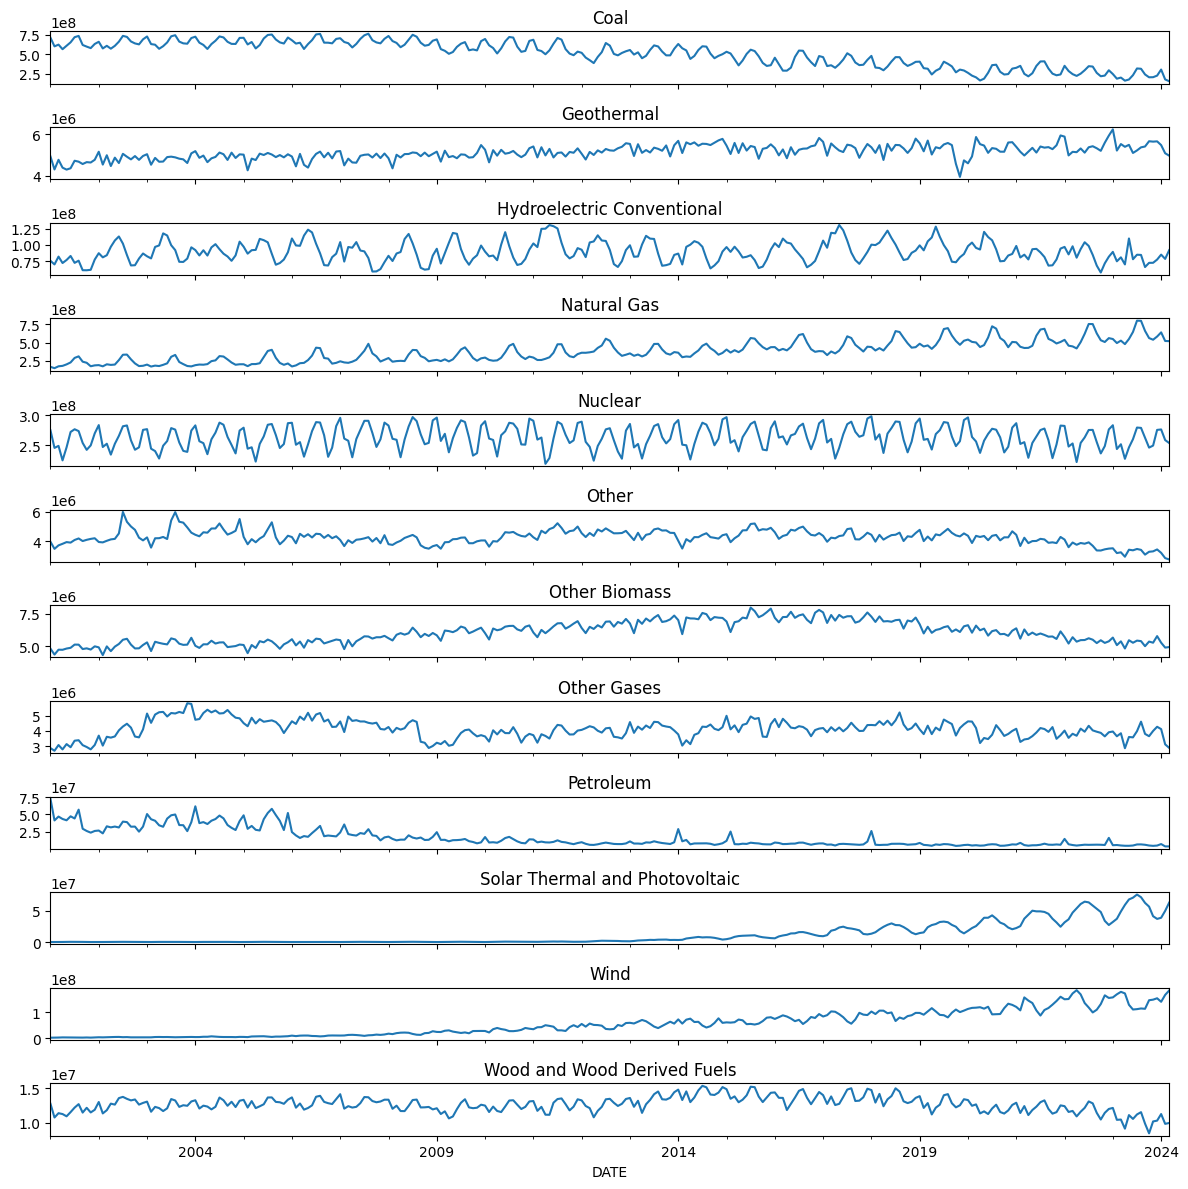

In [24]:
N = SERIES.shape[1] # Número de series de tiempo
COLS = SERIES.columns # Nombre de cada columna

# Grilla
fig, axs = plt.subplots(N,1,figsize=(12,12), sharex=True)

# Gráficos individuales
for i, col in enumerate(COLS):
    SERIES[col].plot(ax=axs[i])
    axs[i].set_title(col)
    
fig.tight_layout()

**Observaciones**

- La generación hidroeléctrica y nuclear se han mantenido estables a lo largo del tiempo y tienen un caracter estacional.
- La generación solar/fotovoltáica y eólica se ha venido incrementando desde aproximadamente 2012
- La generación con carbón y petróleo se ha venido reduciendo

### 4.2. Análisis de correlaciones

La idea acá es generar matrices de dispersión y superponer los valores de los índices de autocorrelación. Para facilitar la interpretación (dado que tenemos muchos pares de series por comparar) mostraremos únicamente los índices de correlación con magnitudes superiores a 0.75:

In [25]:
%matplotlib inline

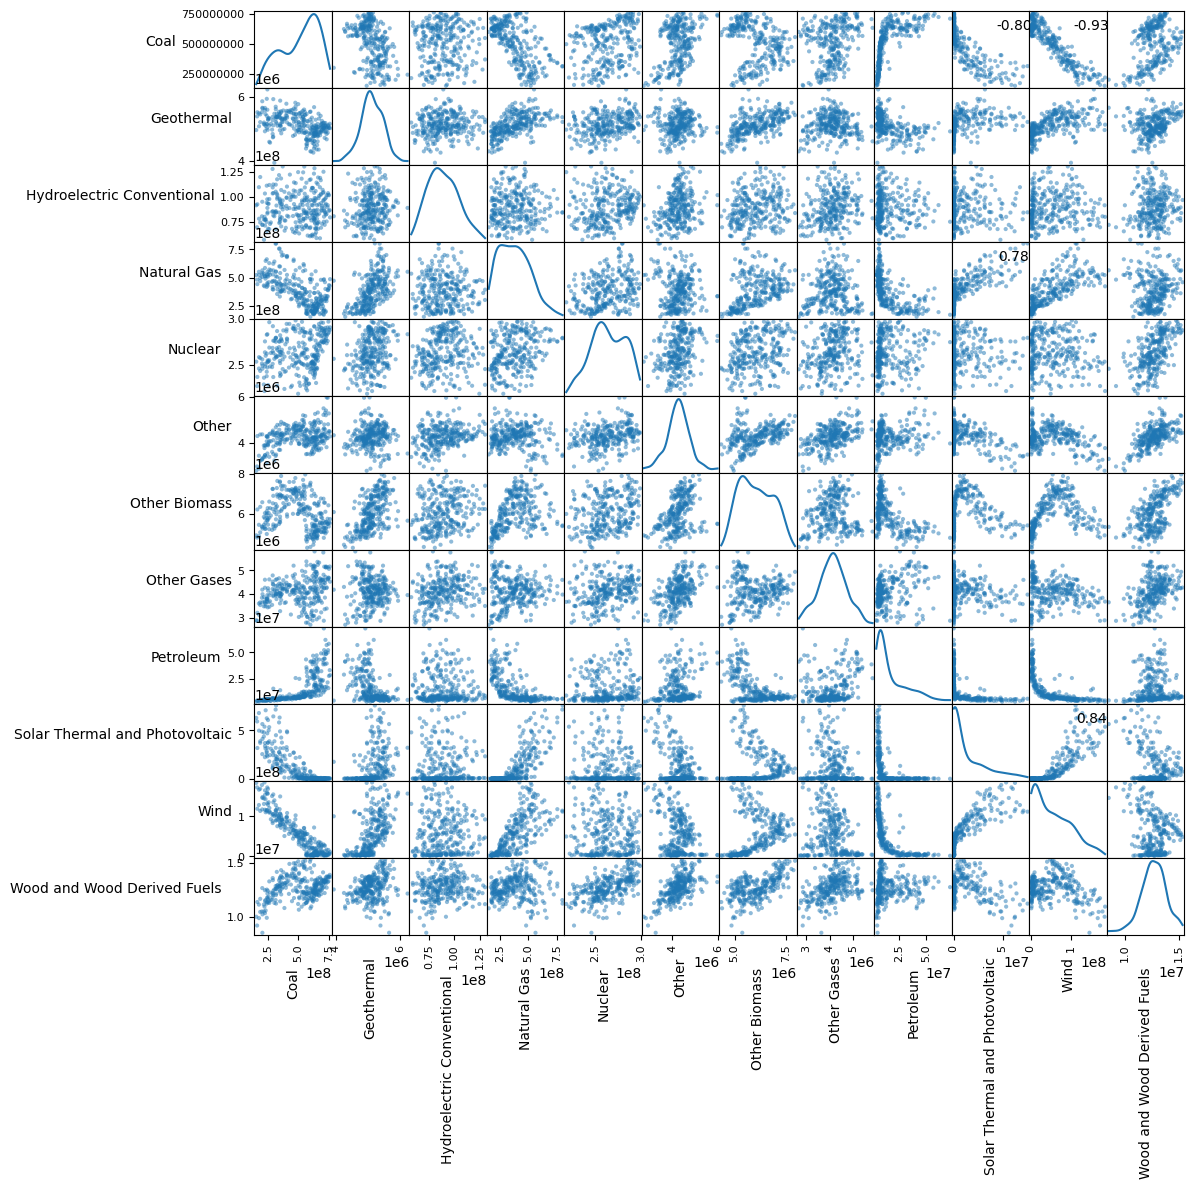

In [26]:
import numpy as np

# Matriz de dispersión
ax = pd.plotting.scatter_matrix(SERIES, alpha=0.5, diagonal='kde', figsize=(12,12))

# Calcular coeficientes de correlación
corr = SERIES.corr().to_numpy()

# Agregar etiquetas únicamente a los coeficientes por encima de la diagonal
# y superiores en magnitud a 0.75
for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
    # Mostrar sólo si la correlación supera 0.75
    if np.abs(corr[i,j]) >= 0.75:
        ax[i, j].annotate(f'{corr[i,j]:.2f}', (0.8, 0.8), 
                          xycoords='axes fraction', ha='center', va='center')

# Ajustar etiquetas ejes horizontal y vertical
for axis in ax.flatten():
    axis.xaxis.label.set_rotation(90)
    axis.yaxis.label.set_rotation(0)
    axis.yaxis.label.set_ha('right')

**Observaciones**

1. Correlaciones positivas por encima de 0.75
   - Solar Thermal and Photovoltaic vs. Wind: 0.84
   - Natural Gas vs. Solar Thermal and Photovoltaic: 0.78
   - Natural Gas vs. Wind: 0.73
  
2. Correlaciones negativas por encima de 0.75
   - Coal vs. Wind: -0.93
   - Coal vs. Solar Thermal and Photovoltaic
   
- Las primeras correlaciones muestran un incremento en el uso de energías solar, térmica, fotovoltáica, gas natural y viento
- Y ha habido una reducción en el uso de generadores a base de carbón a favor de energías térmica y solar
   

### 4.3. Análisis estacional

En este punto la idea es enfocarnos únicamente en las Series que tienen un componente estacional y que han mantenido niveles de generación relativamente constantes a lo largo del tiempo.

Y este análisis estacional lo podríamos hacer usando correlogramas (para determinar la periodicidad de las Series) o con gráficos estacionales para ver las épocas del año de mayor y menor generación. Optaremos por esta segunda opción pues muestra información más detallada.

Comencemos creando una función para generar el gráfico estacional, añadiendo la opción de generarlo a partir de la serie o de su componente estacional:

In [27]:
from statsmodels.tsa.seasonal import STL

def grafico_estacional(df, col, seasonal=False):
    # Crear copia profunda para no modificar nada en el DataFrame original
    df_c = df.copy()

    # Columnas año y mes
    df_c['año'] = df_c.index.year
    df_c['mes'] = df_c.index.month
    
    if seasonal:
        # Extraer componente estacional
        df_stl = STL(df_c[col], seasonal=13).fit()
        col += '_seas'
        df_c[col] = df_stl.seasonal.to_frame(col)
    
    # Tabla pivote
    df_pivot = df_c.pivot(index='mes', columns='año', values=col)
    
    # Por cada año graficar el comportamiento mes a mes
    ax = df_pivot.plot(figsize=(12,4))
    plt.title(f'Gráfico estacional "{col}"')
    plt.xlabel('Mes')
    plt.ylabel('MWh')
    
    # Ajustar leyenda
    plt.legend(title='Año', loc='best', ncols=9);

Comencemos analizando la serie "Hydroelectric Conventional":

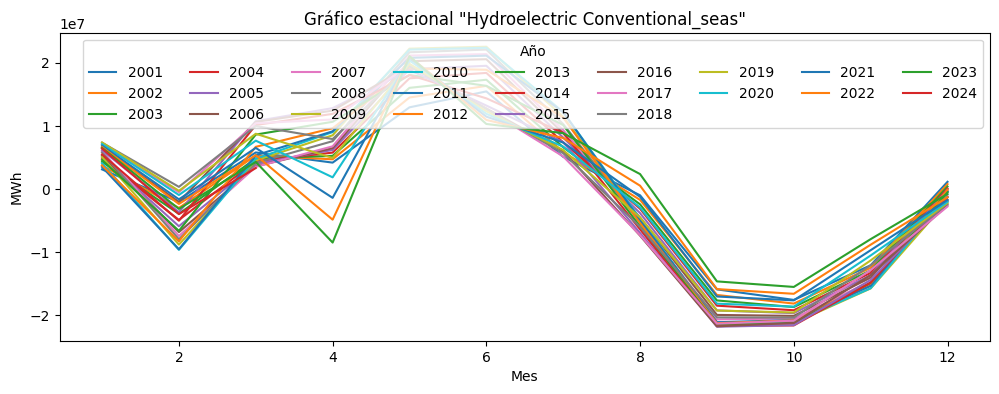

In [28]:
grafico_estacional(SERIES,'Hydroelectric Conventional', seasonal=True)

**Observaciones**
- En el caso de la generación hidroeléctrica los meses de mayor demanda son mayo y junio y los de menor son septiembre y octubre

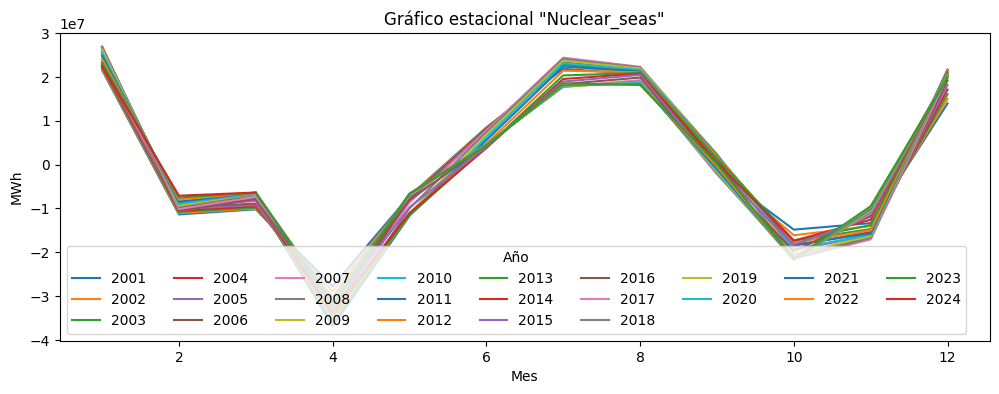

In [29]:
grafico_estacional(SERIES,'Nuclear', seasonal=True)

**Observaciones**
- En el caso de la generación nuclear los meses de mayor demanda son julio y agosto y los de menor son abril y octubre

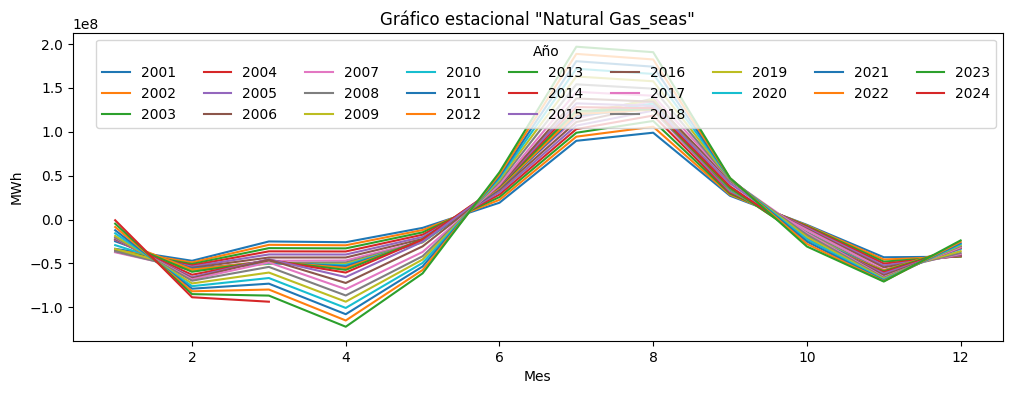

In [30]:
grafico_estacional(SERIES,'Natural Gas', seasonal=True)

**Observaciones**
- En el caso del gas natural los meses de mayor generación son julio y agosto

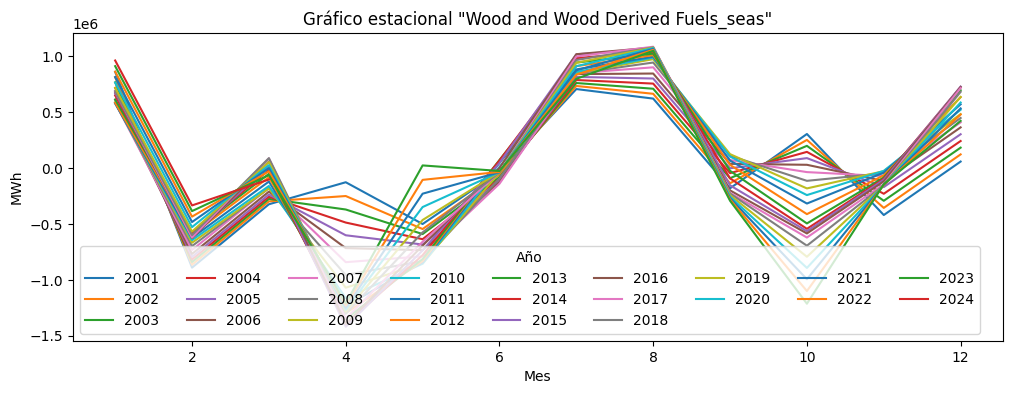

In [31]:
grafico_estacional(SERIES,'Wood and Wood Derived Fuels', seasonal=True)

**Observaciones**

- En el caso de generación a partir de la madera no existe un patrón claro de máximos y mínimos de generación a lo largo del año

### 4.4. Porcentajes de participación en la generación

En este caso la idea es ver para cuáles fuentes existe una tendencia a incrementar o reducir su porcentaje de participación dentro del total de MWh generados a lo largo del tiempo.

En este caso, para determinar si hay incrementos o reducciones, resulta más práctico realizar el análisis sobre la tendencia de las Series.

Creemos un DataFrame únicamente con estas tendencias:

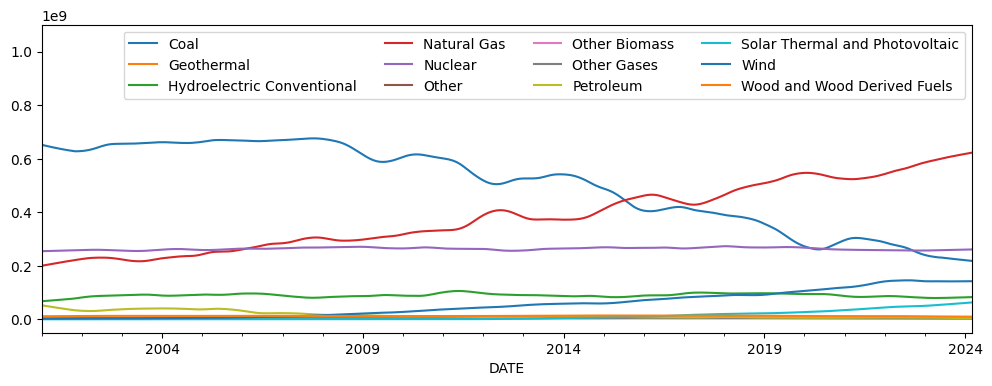

In [31]:
from statsmodels.tsa.seasonal import STL

# Crear DataFrame únicamente con la tendencia de las Series
TRENDS = pd.DataFrame(index=SERIES.index)

for col in SERIES.columns:
    # Descomponer serie
    stl = STL(SERIES[col], seasonal=13).fit()
    
    # Extraer tendencia
    TRENDS[col] = stl.trend

ax=TRENDS.plot(figsize=(12,4));
ax.legend(loc='best', ncols=4)
ax.set_ylim([-0.5e8, 11e8]);

Y ahora transformemos los niveles de generación a porcentajes del total. Como las Series tienen una frecuencia mensual, comencemos remuestreándolas a frecuencia anual y luego sí calculemos los porcentajes:

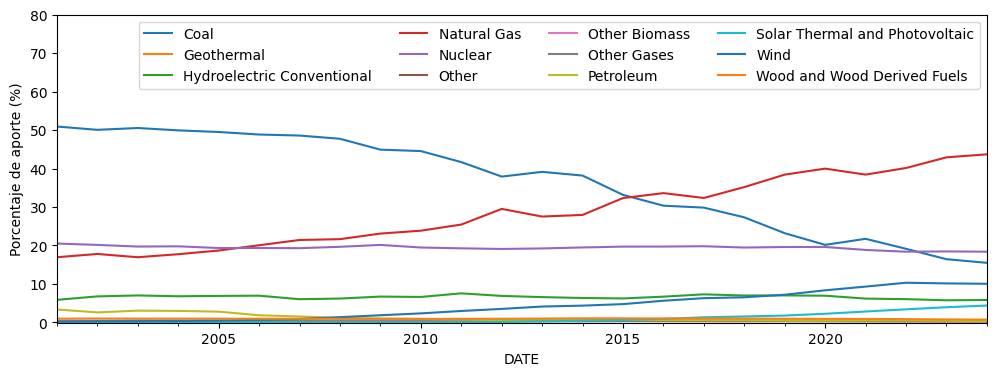

In [32]:
## Porcentajes de participación por año

# Remuestrear tendencia con frecuencia anual
TRENDS_Y = TRENDS.resample('Y').sum()

# Calcular porcentajes de aporte de cada tipo de generación por cada año
tot_anuales = TRENDS_Y.sum(axis=1)
TRENDS_PCTJ = 100*TRENDS_Y.div(tot_anuales, axis=0)

# Graficar
ax=TRENDS_PCTJ.plot(figsize=(12,4));
ax.legend(loc='best', ncols=4)
ax.set_ylim([-0.1, 80]);
ax.set_ylabel('Porcentaje de aporte (%)');


Vemos que series como "Nuclear" y "Hydroelectric Conventional" han mantenido sus porcentajes de participación estables (entorno al 20% y al 8 % respectivamente), mientras que otras han aumentado/disminuido su nivel de participación. Enfoquémonos únicamente en estas:

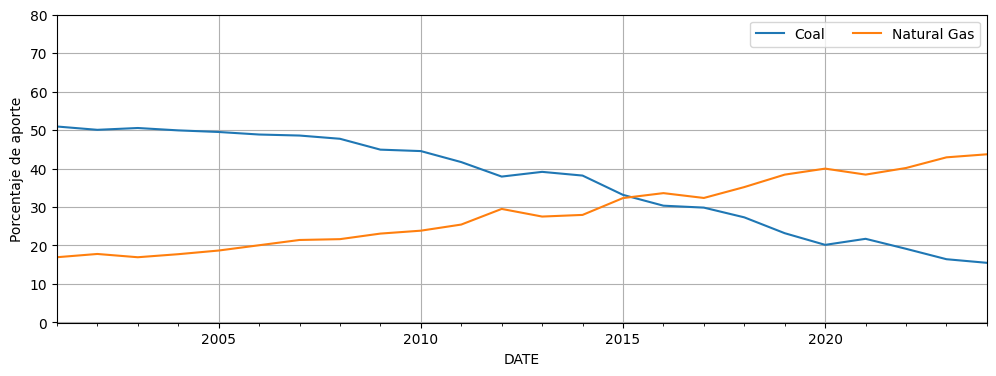

In [33]:
# Enfocarse inicialmente en "Coal" y "Natural Gas"
COLS = ['Coal', 'Natural Gas']

ax=TRENDS_PCTJ[COLS].plot(figsize=(12,4));
ax.legend(loc='best', ncols=4)
ax.set_ylim([-0.1, 80]);
ax.set_ylabel('Porcentaje de aporte')
ax.grid()

**Observaciones**
- La generación a partir de carbón se ha reducido, pasando de tener un aporte del 50% en 2001 a aproximadamente un 16% en 2024
- Por su parte la generación a partir del gas natural a incrementado su porcentaje de participación, pasando del 18% en 2001 al 44% en 2024

Veamos ahora qué ocurre con las fuentes que han tenido un menor porcentaje de participación históricamente ('Petroleum', , 'Solar Thermal and Photovoltaic', 'Wind'):

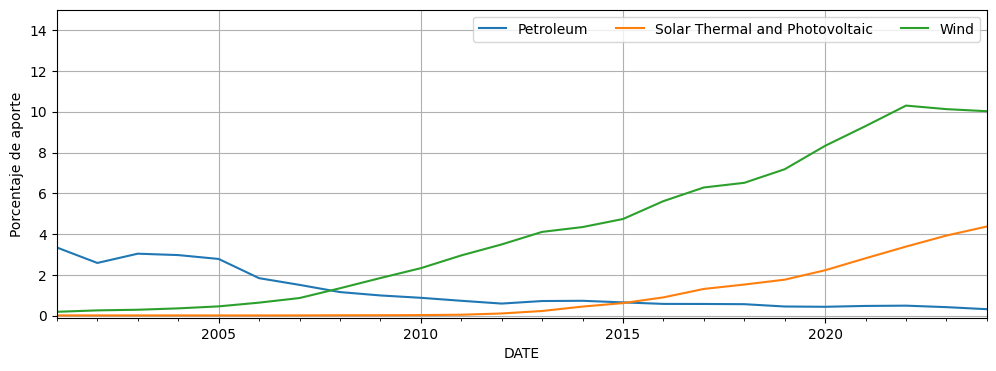

In [34]:
COLS = ['Petroleum', 'Solar Thermal and Photovoltaic', 'Wind']

ax=TRENDS_PCTJ[COLS].plot(figsize=(12,4));
ax.legend(loc='best', ncols=4)
ax.set_ylim([-0.1, 15]);
ax.set_ylabel('Porcentaje de aporte')
ax.grid()

**Observaciones**

- Hay un descenso en el uso del petróleo como fuente de energía, pasando de una participación del 3.5% en el año 2001 a menos del 1% en 2024
- Hay un incremento en el uso de la energía solar y eólica como fuentes de energía, pasando de una participación de menos del 0.5% en 2001 a poco más del 4% y el 10% respectivamente en el 2024.

## 5. Conclusiones

¡Y en este punto ya hemos usado diferentes herramientas para llevar a cabo el análisis exploratorio! Lo único que nos resta es sintetizar todas las observaciones que hemos obtenido para intentar responder a la pregunta:

**¿Existen fuentes de generación que se han mantenido estables o que han incrementado/reducido su nivel de generación en el periodo 2001-2024?**

Con base en las observaciones que hemos venidos realizando acá están los resultados más importantes:

- El análisis de correlación sugiere el aumento en la generación de energía solar térmica, fotovoltaica y eólica está asociado con un incremento en el uso de gas natural y una significativa disminución en la generación a base de carbón.
- Existen fuentes de generación de energía que se han mantenido estables (como la hidroeléctrica y la nuclear) y otras que han mostrado tendencias claras de incremento (solar/fotovoltáica, eólica) o reducción (carbón y petróleo) en el periodo 2001-2024.

Y como conclusión final podemos decir que **el análisis muestra una clara transición hacia fuentes de energía más limpias y sostenibles, como la solar, eólica y el gas natural, mientras que la dependencia de fuentes de energía más contaminantes como el carbón y el petróleo ha disminuido drásticamente. Además, las fuentes hidroeléctricas y nucleares han proporcionado una base estable de generación a lo largo del periodo estudiado.**
